# Домашнее задание 2: визуализация данных 

### 1. Первичный анализ данных 

Посмотрим на наши данные и, если надо, почистим их

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Всё отображается корректно, но я бы заменил колонку "#"(**ID for each pokemon**) для удобства.

Что не маловажно, **у покемона разных стадий один и тот же ID**.

In [4]:
data = data.rename({'#':'ID'}, axis = 1)

Проверяем **размерность.**

In [5]:
data.shape

(800, 13)

Узнаём сколько у нас **дубликатов.**

In [6]:
data.duplicated().sum()

0

Итого у нас **800** строк, **13** колонок. Дубликатов нет.

In [7]:
data.isna().sum()

ID              0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Чистить строки с пропусками я не буду, потому что это повредит смыслам.  
Читаем описание колонки "Type 2" - Type 2: Some pokemon are dual type and have 2.  
Иначе говоря, не все покемоны имеют два стихийных типа. Всего стихийных типов 18.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Все данные в полном порядке, формат данных не вижу смысла нигде менять.

In [29]:
data.head(5)

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


1. **ID** - ID покемона
1. **Name** - Имя покемона
2. **Type 1** - Первый стихийный тип
3. **Type 2** - Второй стихийный тип
4. **Total** - Сумма всех статистических данных, согласно официальному руководству
5. **HP** - Здоровье покемона
6. **Attack** - Базовая атака покемона
7. **Defense** - Базовая защита покемона
8. **Sp. Atk** - Специальная атака покемона
9. **Sp. Def** - Защита от специальных атак другого покемона
10. **Speed** - Скорость покемона
11. **Generation** - Поколение покемона
12. **Legendary** - Легендарен ли покемон или нет

### 2. Построить график распределения всех параметров покемонов и описать смыслы распределения 

Для удобства я построю все гистограммы на одном рисунке и отмечу среднее значение.

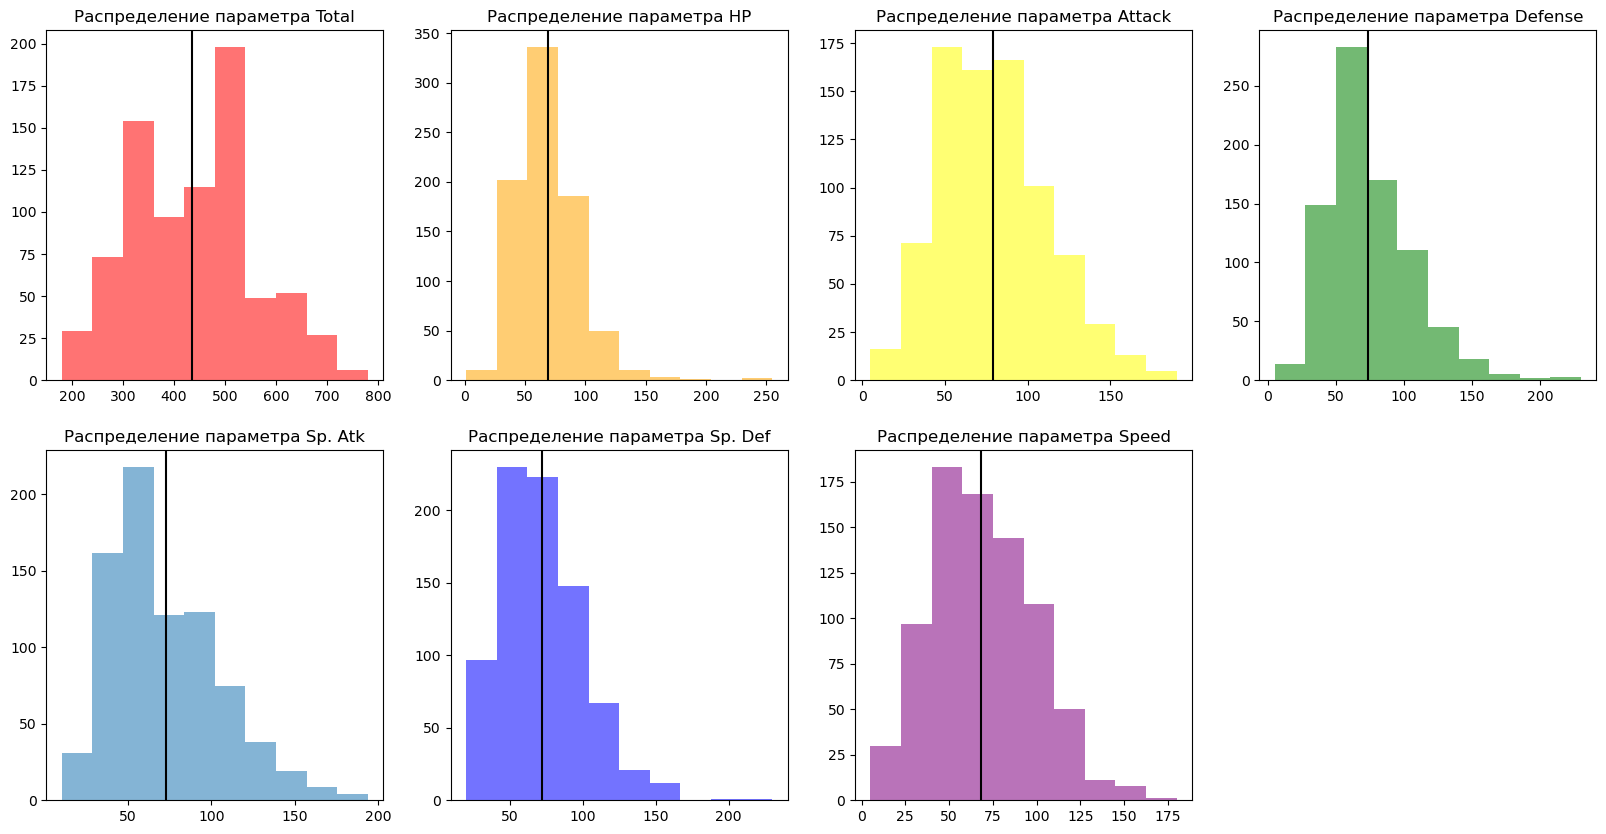

In [9]:
fig, ax = plt.subplots(2,4, figsize =(20,10))

ax[0][0].hist(data.Total, alpha=0.55, color='red')
ax[0][1].hist(data.HP, alpha=0.55, color='orange')
ax[0][2].hist(data.Attack, alpha=0.55, color='yellow')
ax[0][3].hist(data.Defense, alpha=0.55, color='green')
ax[1][0].hist(data['Sp. Atk'], alpha=0.55)
ax[1][1].hist(data['Sp. Def'],alpha=0.55, color='blue')
ax[1][2].hist(data.Speed,alpha=0.55, color='purple')

ax[0][0].set_title('Распределение параметра Total')
ax[0][1].set_title('Распределение параметра HP')
ax[0][2].set_title('Распределение параметра Attack')
ax[0][3].set_title('Распределение параметра Defense')
ax[1][0].set_title('Распределение параметра Sp. Atk')
ax[1][1].set_title('Распределение параметра Sp. Def')
ax[1][2].set_title('Распределение параметра Speed')

fig.delaxes(ax[1][3])

ax[0][0].axvline(data.Total.mean(), color='black')
ax[0][1].axvline(data.HP.mean(), color='black')
ax[0][2].axvline(data.Attack.mean(), color='black')
ax[0][3].axvline(data.Defense.mean(), color='black')
ax[1][0].axvline(data['Sp. Atk'].mean(), color='black')
ax[1][1].axvline(data['Sp. Def'].mean(), color='black')
ax[1][2].axvline(data.Speed.mean(), color='black')

**Что же всё это значит?**  
Датасет взят из игр по покемонам, а с точки зрения любого гейм-дизайна важно соблюдать **баланс** в игре, то есть не допускать, что будет слишком много сильных и мало слабых покемонов.  
Гистрограммы с распределением данных по параметрам показывают, что разработчики предусмотрели этот момент. В целом, можно сказать, что данные распределены нормально. Пусть где-то получше, где-то похуже.  
Я бы отметил гистограммы с параметрами **HP** и **Defense**, где лучше всего видно что есть откровенно слабые и откровенно сильные покемоны, что логично, ведь у нас есть уникальные, легендарные и мега покемоны.  
Если обратить внимание на гистограмму с **Total** (сумма всех характеристик), то виден проработанный **игровой баланс**, однако для того, чтобы в этом сильнее убедиться я построю ящик с усами для этого параметра на следующем этапе.

### 3. Построить ящик с усами трех любых параметров покемонов и описать смыслы

Сохраню нужные мне параметры в отдельный датасет.

In [10]:
data_box = data[['Total', 'Attack', 'Speed']]
data_box

,Total,Attack,Speed
0,318,49,45
1,405,62,60
2,525,82,80
3,625,100,80
4,309,52,65
...,...,...,...
795,600,100,50
796,700,160,110
797,600,110,70
798,680,160,80


Text(0.5, 1.0, 'Параметр Speed')

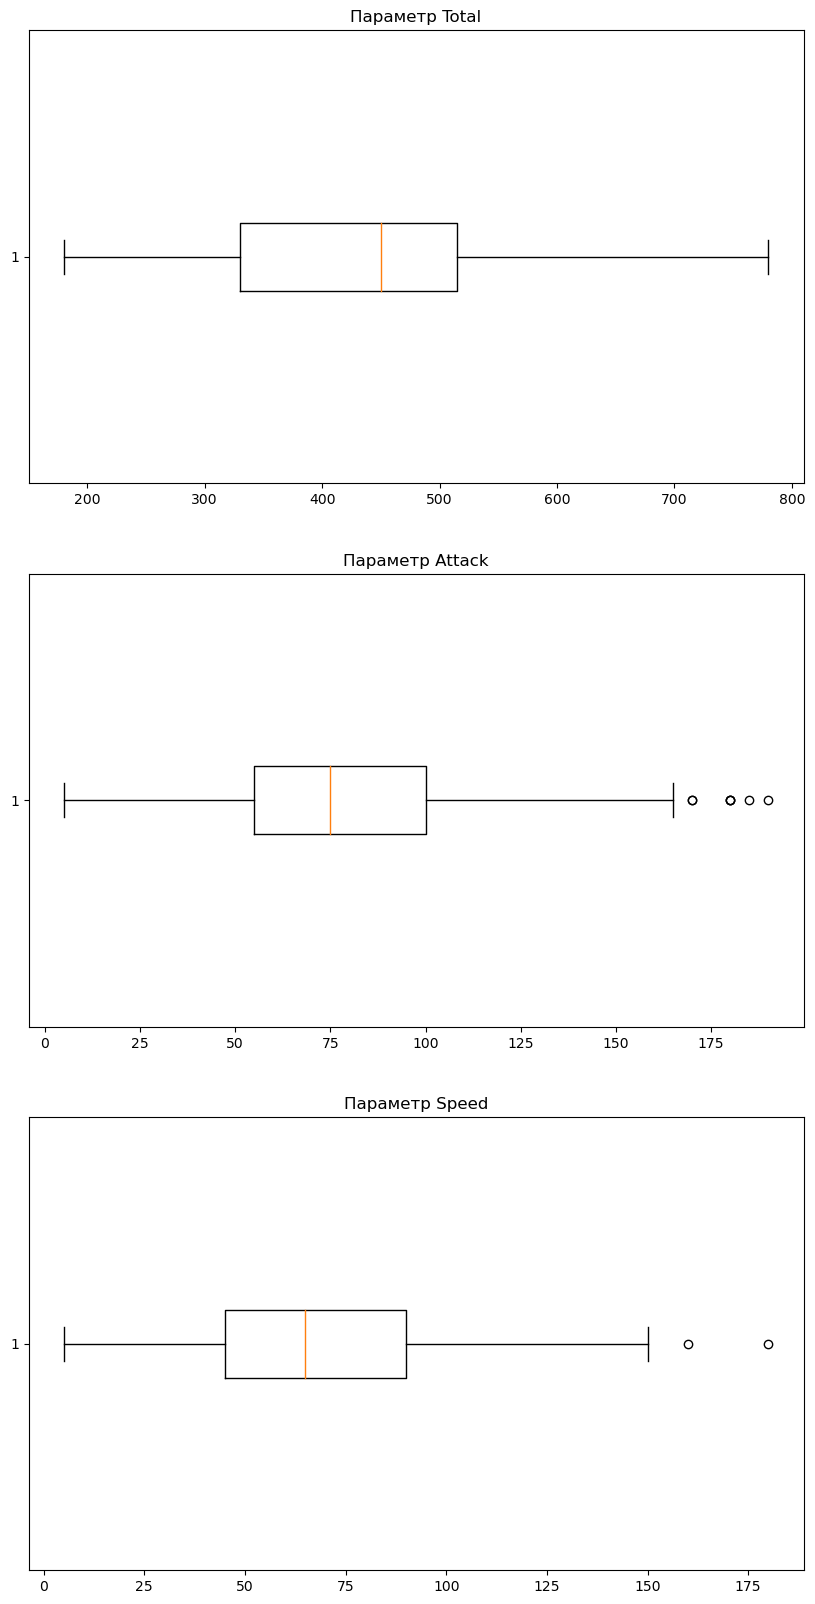

In [11]:
fig, ax = plt.subplots(3,1, figsize =(10,20))

ax[0].boxplot(data.Total, vert=False)
ax[0].set_title('Параметр Total')

ax[1].boxplot(data.Attack,vert=False)
ax[1].set_title('Параметр Attack')

ax[2].boxplot(data.Speed,vert=False)
ax[2].set_title('Параметр Speed')

* **Total**. Возвращаясь к прошлому вопросу, можно сказать, что игровой баланс действительно соблюдается. В колонке Total нет ни одного выбороса. Видно, что медиана находится почти в центре, с небольшим смещением влево.  
* **Attack**. Как и в любой другой игре должны быть боссы, уникальные покемоны, у которых есть один перекаченный параметр, но со слабыми местами. Всего "супер-атакующих" покемонов 4.
* **Speed**. Здесь тоже всего два выброса с "супер-быстрыми" покемонами.  
Как итог можно подтвердить слова о проработанном игровом балансе. Стоит помнить, что в данном датасете есть как и базые покемоны с самыми слабыми характеристиками, так и их эволюции, так и мега с легендарными покемонами.

### 4. Построить лепестковую диаграмму двух любых покемонов и сравнить их способности (описать словами, что на графике)

Как же я люблю покемонов, поэтому буду анализировать двух конкретных. **Мега Мьюту X** (по-моему мнению самый сильный и красивый покемон да ещё и с тяжелой судьбой) и **Мега Гаярадос** (самый страшный и с самой смешной первой формой эволюции).  
Ожидается, что Мьюту сильнее Гаярадоса по всем параметрам.

In [27]:
mewtwo = data[data.Name == 'MewtwoMega Mewtwo X'][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]
gyarados = data[data.Name == 'GyaradosMega Gyarados'][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]
categories = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
num_categories = len(categories)
angles = [n / float(num_categories) * 2 * math.pi for n in range(num_categories)]
angles += angles[:1]
mewtwo = mewtwo.append(mewtwo[:1])
gyarados = gyarados.append(gyarados[:1])



fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, mewtwo, 'o-', linewidth=3, color = 'pink', label='Mega Mewtwo X')
ax.plot(angles, gyarados, 'o-', linewidth=3, label='Mega Gyarados')

ax.fill(angles, mewtwo, alpha=0.35, color='pink')
ax.fill(angles, gyarados, alpha=0.35, color='blue')

ax.set_thetagrids([a * 180/math.pi for a in angles[:-1]], labels=categories)
ax.set_title('Mega Mewtwo X VS. Mega Gyarados ')
ax.legend(loc='upper left')
plt.show()


SyntaxError: invalid syntax (493433384.py, line 25)

Конечно, площадь параметров Мьюту **намного больше** чем у Гаярадоса, что говорит о превосходстве Мьюту. Однако удивительно, что есть параметры, где змей побеждает, чего я не ожидал.  
Это параметры **Defense** и **Sp. Def**. Иначе говоря, защита от базовых атак и защита от специальных атак выше у змея.

### 5. Построить столбиковую диаграмму по количеству покемонов каждого поколения.

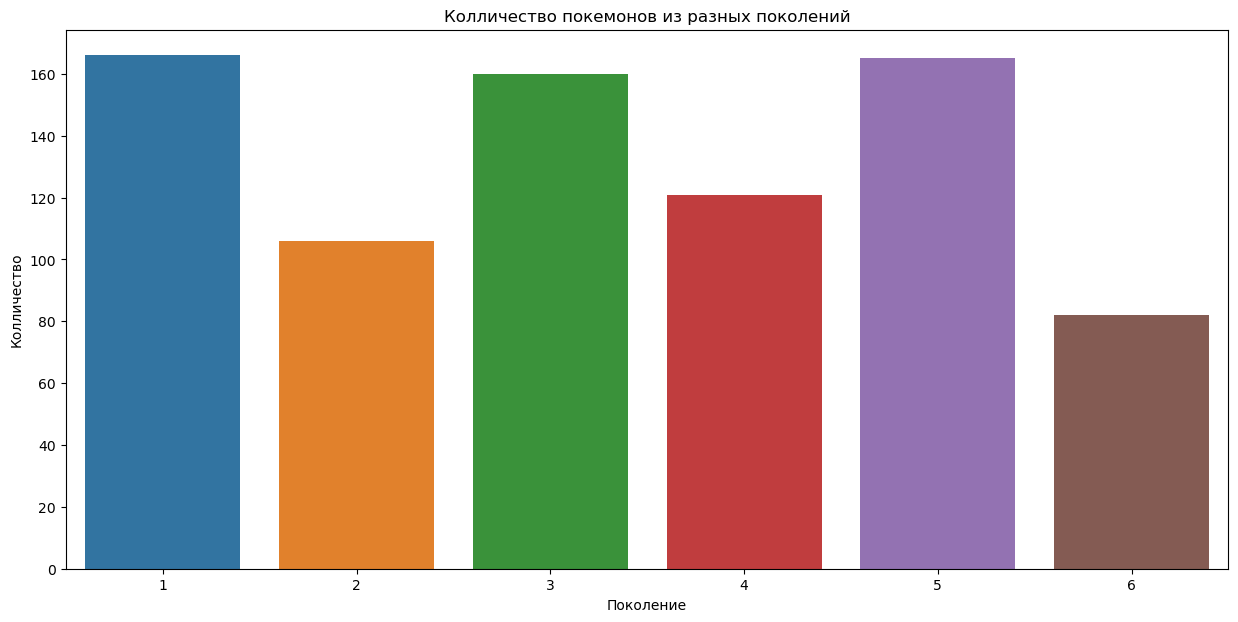

In [13]:
plt.figure(figsize=(15,7))

sns.countplot(data=data, x='Generation')

plt.title('Колличество покемонов из разных поколений')
plt.xlabel('Поколение')
plt.ylabel('Колличество')
plt.show()


Поколение -- это серии игр по Покемонам. Каждое поколение имеет несколько игр и привязку к географии c новыми покемонами.  
Например, игры первого поколения происходят в регионе **Канто**. Всего в этом поколении 4 игры (Red, Green, Blue и спец.издание Yellow. Всего поколений **9**, последнее из них происходит в Греции на Пиренейских островах. В датасете всего 6 поколений, потому что последнее обновление было 7 лет назад, а игры по покемонам до сих пор выпускаются.  
**Однако, тут можно обнаружить проблемы.** Все источники говорят о том, что в первом поколении всего 151 покемонов, а график показывает, что их больше 160. В третьем поколении должно быть только 135 покемонов. В пятом 156. В шестом 72.  Нужно разобраться, что тут происходит.

In [14]:
data['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [15]:
pokemon_first = data[data.Generation==1]
len(pokemon_first.Name.unique())

166

In [16]:
len(pokemon_first.ID.unique())

151

**Тут всё стало ясно. Дело в том, что на вики и официальная информация считает покемонов без их мега-эволюций. То есть один покемон и такой же покемон, но с мега-эволюцией считается за одного. Поэтому в первом поколении 166 покемонов вместо 151. У нескольких строчек с покемоном может быть один и тот же ID.**

Вот пример:

In [17]:
data[data.ID==150]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


Три покемона считаются за одного.

### 6. Выбрать либо покемонов одного поколения, либо самых сильных/слабых покемонов, либо покемонов одного типа, сформулировать одну гипотезу о них и с помощью визуализации подтвердить или опровергнуть ее.

Самые главные и интересные покемоны это легендарные. Их очень сложно получить в свою коллекцию и их мало. Поэтому я хочу выдвинуть гипотезу, что в каждом поколении видео-игр плюс-минус одинаковое колличество легендарных покемонов, чтобы поддерживать интерес игроков. Для подтверждения этой гипотезы я сделаю столбчатые диаграммы по каждому поколению.

In [18]:
legends = data[data.Legendary==True]
len(legends.ID.unique())

46

Всего у нас 46 легендарных покемонов (брать в датасет их эволюции и вариации я не буду, чтобы не смазать картину.)

In [19]:
legends = legends.drop_duplicates(subset=['ID'])

In [20]:
legends.shape

(46, 13)

Теперь я оставил только то, что нужно.

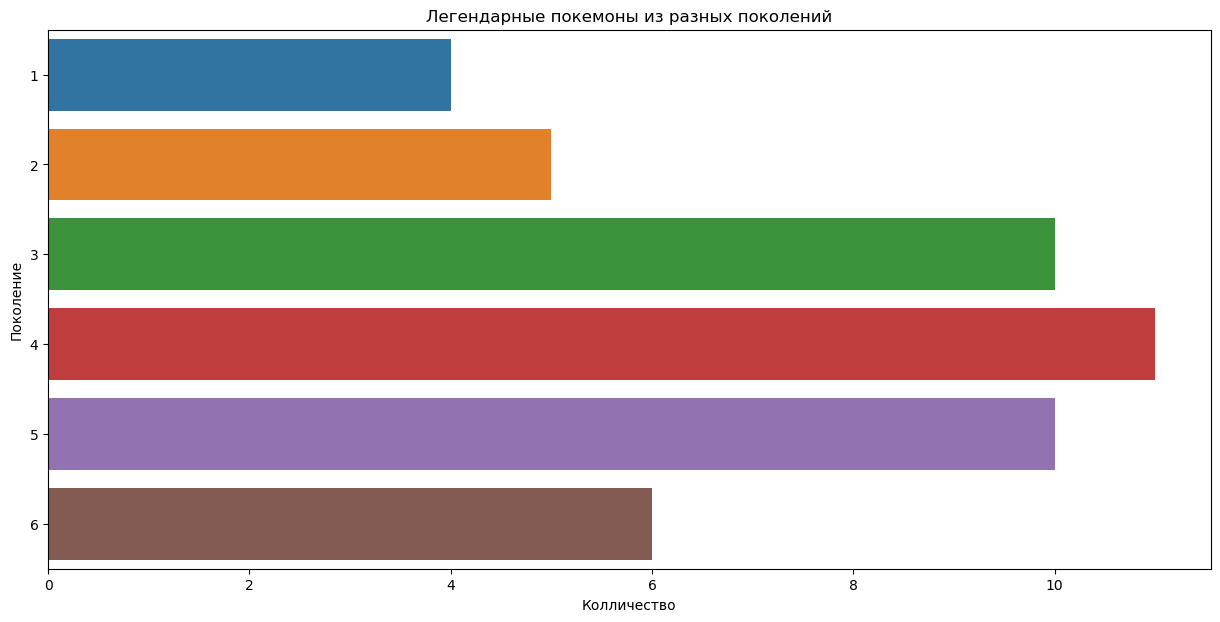

In [21]:

plt.figure(figsize=(15,7))

sns.countplot(data=legends, y='Generation')
plt.title('Легендарные покемоны из разных поколений')
plt.ylabel('Поколение')
plt.xlabel('Колличество')
plt.show()

Гипотезу можно опровергнуть. В некоторых поколениях действительно больше легендарных покемонов, чем в других. Я рассчитывал, что колличество будет примерно одномерное с погрешностью в 2-3 покемона.  
График же показывает, что разница между самым маленьким колличеством легендарных покемонов и самым большим -- 7 покемонов. Я удивлён.


**Спасибо!**